Importing Necessary Libraries

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Load the dataset
forest_fire = pd.read_csv("forestfires1.csv", encoding='latin-1')

# 1. Initial Inspection
print("--- Initial Data ---")
print(forest_fire.head())
print("\n--- Data Info ---")
print(forest_fire.info())
print("\n--- Descriptive Statistics ---")
print(forest_fire.describe())

--- Initial Data ---
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   NaN   NaN

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    501 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-n

Checking for missing values

In [56]:
# 2. Check for Missing Values
print(forest_fire.isnull().sum())
cols_with_missing = [col for col in forest_fire.columns if forest_fire[col].isnull().any()]
print("\nColumns with Missing Values:", cols_with_missing)
forest_fire['FFMC'] = forest_fire['FFMC'].fillna(forest_fire['FFMC'].mean())
mode_cols=['rain', 'area']
forest_fire[mode_cols] = forest_fire[mode_cols].fillna(forest_fire[mode_cols].mode().iloc[0])

X          0
Y          0
month      0
day        0
FFMC      16
DMC        0
DC         0
ISI        0
temp       0
RH         0
wind       0
rain     101
area     101
dtype: int64

Columns with Missing Values: ['FFMC', 'rain', 'area']


In [57]:
#Missing values after removal
cols_with_missing = [col for col in forest_fire.columns if forest_fire[col].isnull().any()]
print("\nColumns with Missing Values:", cols_with_missing)


Columns with Missing Values: []


In [58]:
# 3. Data Type Conversion
# Checking for categorical data type
print("\n--- Data Types Before Conversion ---")
print(forest_fire.dtypes)


--- Data Types Before Conversion ---
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


In [59]:
#Coverting categorical variables to 'category' type
forest_fire['month'] = forest_fire['month'].astype('category')
forest_fire['day'] = forest_fire['day'].astype('category')
print("\n--- Data Types After Conversion ---")
print(forest_fire.dtypes)


--- Data Types After Conversion ---
X           int64
Y           int64
month    category
day      category
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
dtype: object


In [60]:
#Finding numerical columns
numeric= [col for col in forest_fire.columns if forest_fire[col].dtype in ['int64', 'float64']]
print("\nNumerical Columns:")
print(numeric)


Numerical Columns:
['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


Analysing Target Variable

<Axes: ylabel='rain'>

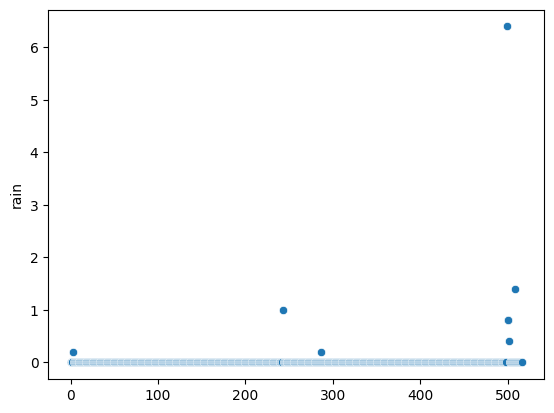

In [61]:
sns.scatterplot(forest_fire['rain'])

<Axes: ylabel='area'>

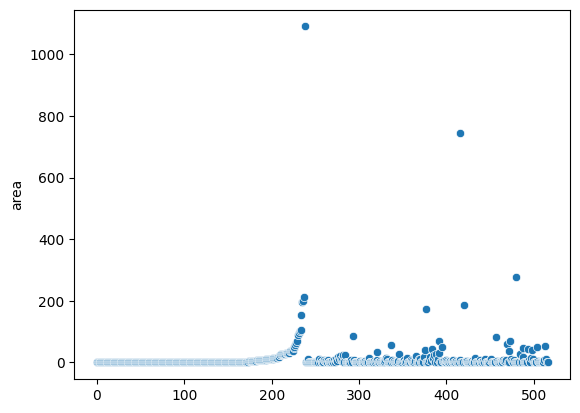

In [62]:
sns.scatterplot(forest_fire['area'])

Outlier Analysis

In [63]:
# 4. Outlier Handling (using IQR method)
print("\n--- Outlier Analysis ---")
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


--- Outlier Analysis ---


In [64]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = data[((data[column] < lower_bound) | (data[column] > upper_bound))].shape[0]

    print(f"Number of outliers in {column} before removal: {num_outliers}")

    data = data[((data[column] >= lower_bound) & (data[column] <= upper_bound))]

    print(f"Number of outliers in {column} after removal: {data[((data[column] < lower_bound) | (data[column] > upper_bound))].shape[0]}")

    return data

# Remove outliers in 'rain' and 'area'
forest_fire = remove_outliers_iqr(forest_fire, 'rain')
forest_fire = remove_outliers_iqr(forest_fire, 'area')

print("\nDescriptive Statistics After Outlier Removal:")
print(forest_fire.describe())

Number of outliers in rain before removal: 8
Number of outliers in rain after removal: 0
Number of outliers in area before removal: 63
Number of outliers in area after removal: 0

Descriptive Statistics After Outlier Removal:
                X           Y        FFMC         DMC          DC         ISI  \
count  446.000000  446.000000  446.000000  446.000000  446.000000  446.000000   
mean     4.582960    4.289238   90.484704  109.550673  545.018386    8.981390   
std      2.303115    1.237693    5.793950   63.883147  250.128688    4.636343   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.300000   63.875000  435.200000    6.400000   
50%      4.000000    4.000000   91.600000  106.900000  658.200000    8.400000   
75%      6.000000    5.000000   92.600000  141.200000  714.200000   10.600000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind   

Univariate analysis after removal


<Axes: ylabel='area'>

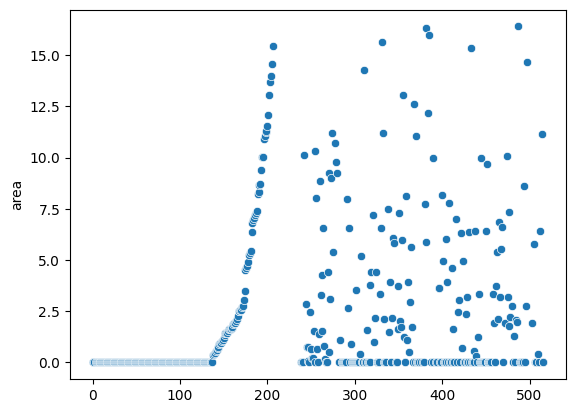

In [65]:
print('Univariate analysis after removal')
sns.scatterplot(forest_fire['area'])

<Axes: ylabel='rain'>

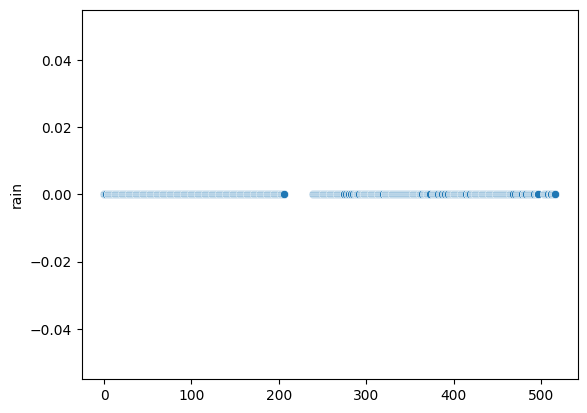

In [66]:
sns.scatterplot(forest_fire['rain'])

Checking for duplicate rows

In [67]:
# 5. Check for Duplicates
print("\n--- Duplicate Rows ---")
print("Number of duplicate rows:", forest_fire.duplicated().sum())

# Remove duplicates (if any)
forest_fire = forest_fire.drop_duplicates()
print("\nNumber of duplicate rows after removal:", forest_fire.duplicated().sum())


--- Duplicate Rows ---
Number of duplicate rows: 3

Number of duplicate rows after removal: 0


In [68]:
#Count after data cleaning
forest_fire.head()
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X       443 non-null    int64   
 1   Y       443 non-null    int64   
 2   month   443 non-null    category
 3   day     443 non-null    category
 4   FFMC    443 non-null    float64 
 5   DMC     443 non-null    float64 
 6   DC      443 non-null    float64 
 7   ISI     443 non-null    float64 
 8   temp    443 non-null    float64 
 9   RH      443 non-null    int64   
 10  wind    443 non-null    float64 
 11  rain    443 non-null    float64 
 12  area    443 non-null    float64 
dtypes: category(2), float64(8), int64(3)
memory usage: 43.1 KB


Univariate Analysis


--- Univariate Analysis ---


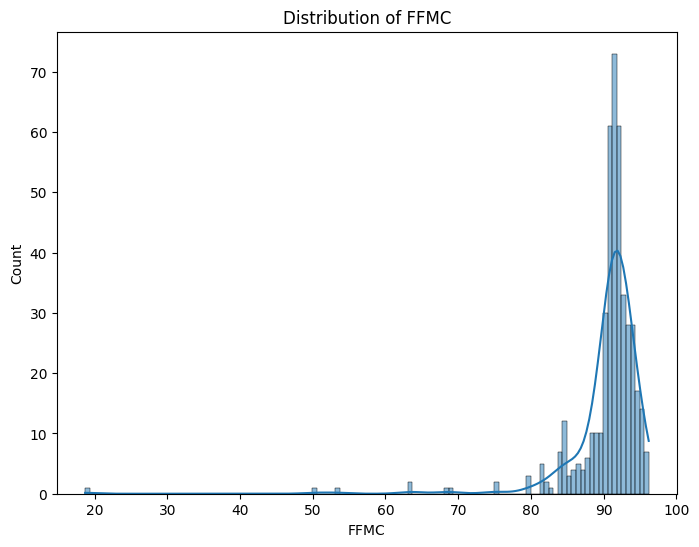


Descriptive Statistics for FFMC:
count    443.000000
mean      90.480949
std        5.813338
min       18.700000
25%       90.250000
50%       91.600000
75%       92.650000
max       96.200000
Name: FFMC, dtype: float64


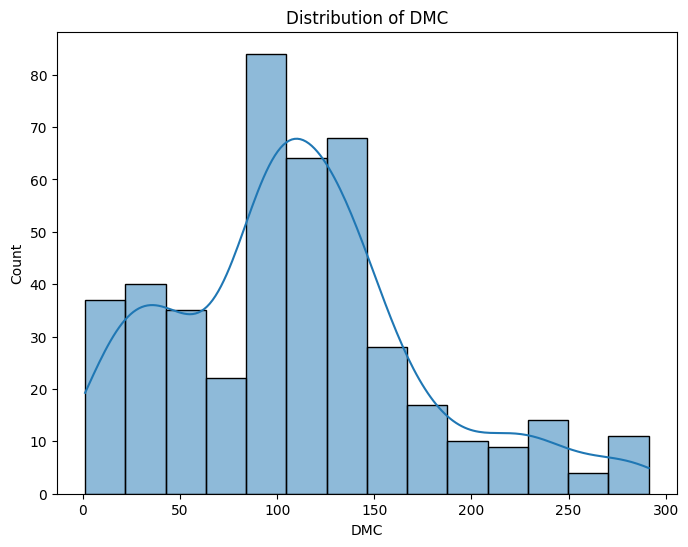


Descriptive Statistics for DMC:
count    443.000000
mean     109.507675
std       64.076255
min        1.100000
25%       61.450000
50%      105.800000
75%      141.200000
max      291.300000
Name: DMC, dtype: float64


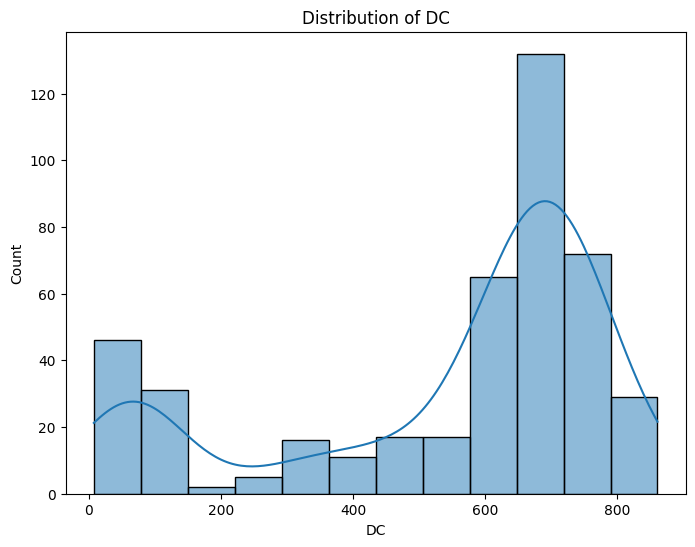


Descriptive Statistics for DC:
count    443.000000
mean     545.351242
std      250.466063
min        7.900000
25%      437.100000
50%      658.200000
75%      714.300000
max      860.600000
Name: DC, dtype: float64


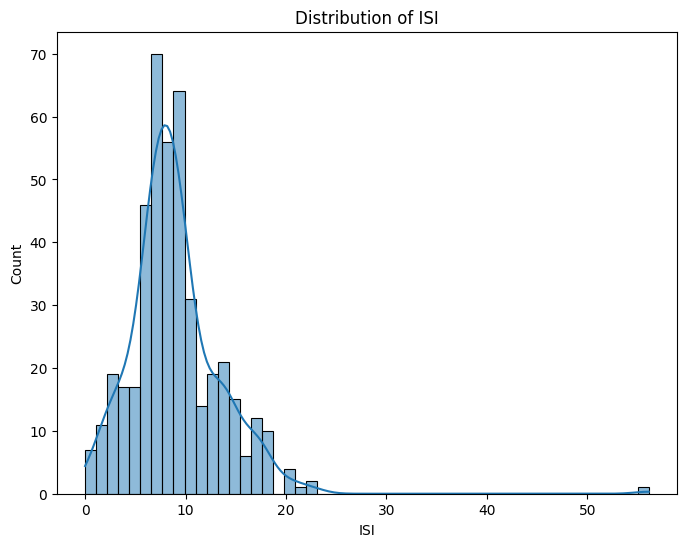


Descriptive Statistics for ISI:
count    443.000000
mean       8.980587
std        4.650459
min        0.000000
25%        6.350000
50%        8.400000
75%       10.600000
max       56.100000
Name: ISI, dtype: float64


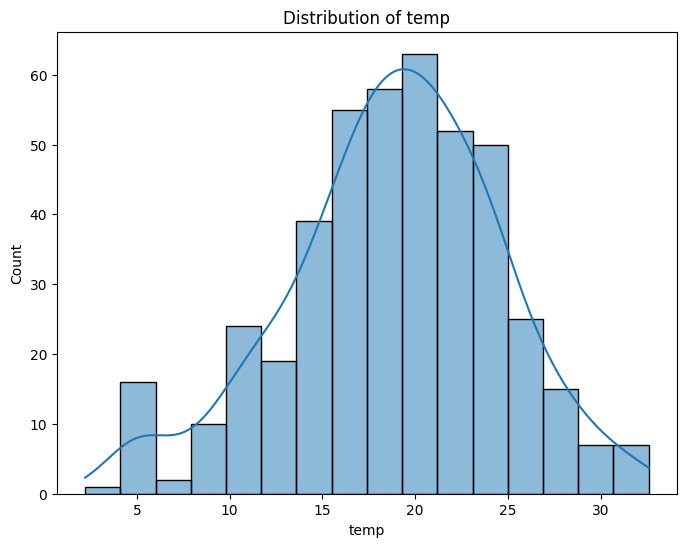


Descriptive Statistics for temp:
count    443.000000
mean      18.843115
std        5.735053
min        2.200000
25%       15.450000
50%       19.200000
75%       22.800000
max       32.600000
Name: temp, dtype: float64


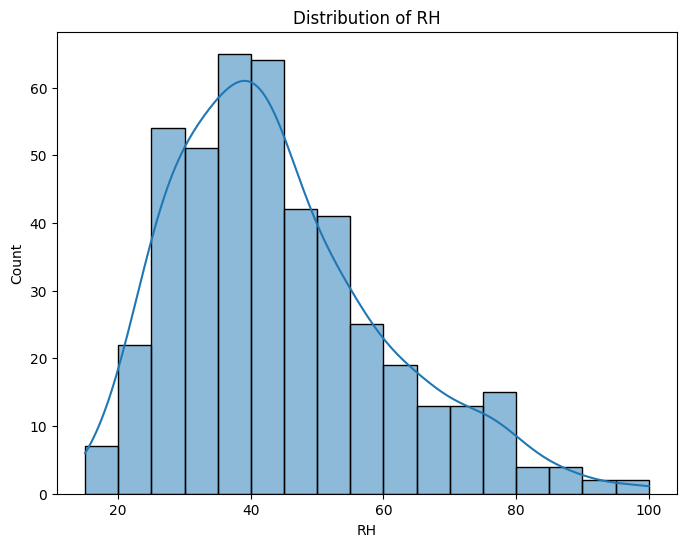


Descriptive Statistics for RH:
count    443.000000
mean      44.137698
std       15.902460
min       15.000000
25%       33.000000
50%       41.000000
75%       53.000000
max      100.000000
Name: RH, dtype: float64


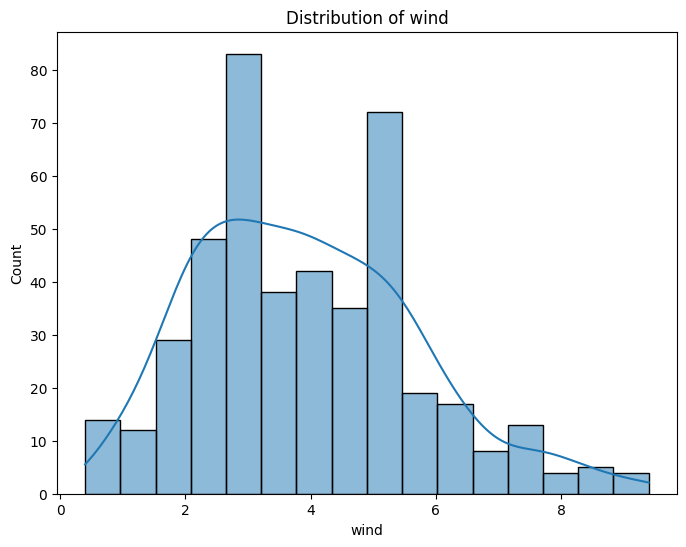


Descriptive Statistics for wind:
count    443.000000
mean       3.930023
std        1.770312
min        0.400000
25%        2.700000
50%        3.600000
75%        4.900000
max        9.400000
Name: wind, dtype: float64


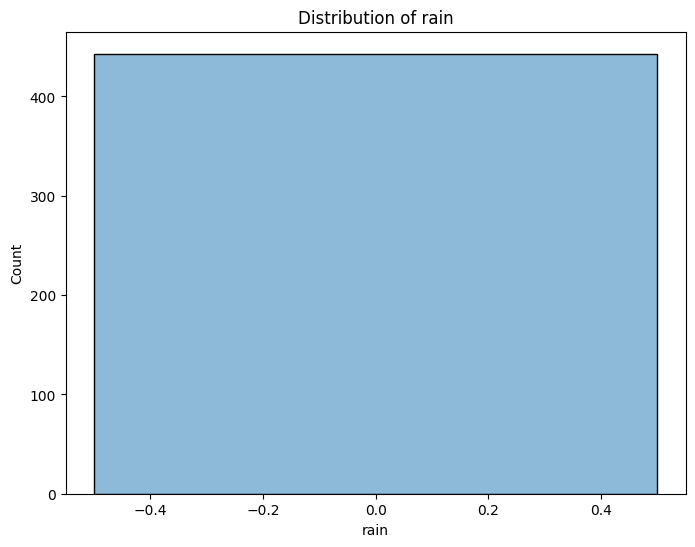


Descriptive Statistics for rain:
count    443.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: rain, dtype: float64


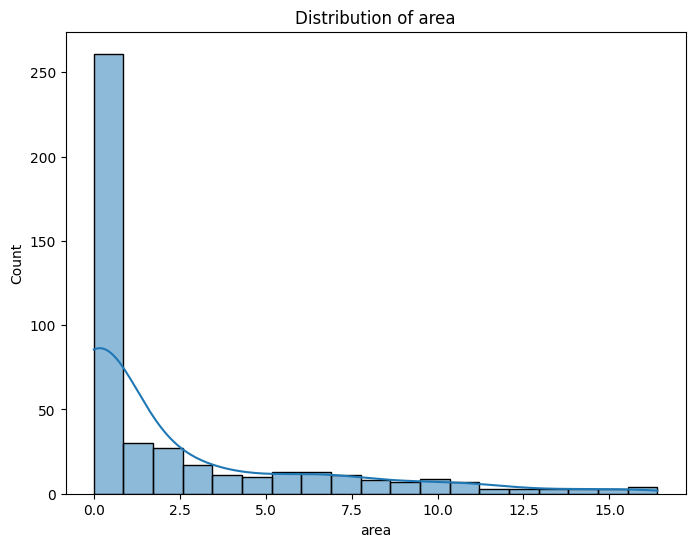


Descriptive Statistics for area:
count    443.000000
mean       2.360361
std        3.791821
min        0.000000
25%        0.000000
50%        0.000000
75%        3.310000
max       16.400000
Name: area, dtype: float64


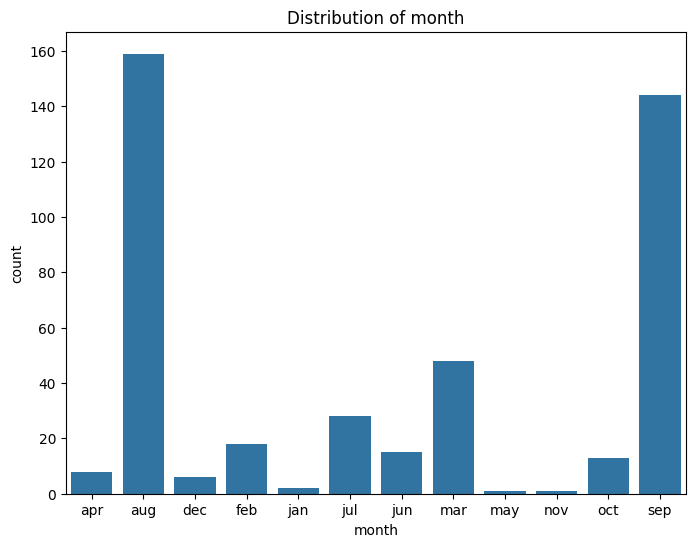


Value Counts for month:
month
aug    159
sep    144
mar     48
jul     28
feb     18
jun     15
oct     13
apr      8
dec      6
jan      2
may      1
nov      1
Name: count, dtype: int64


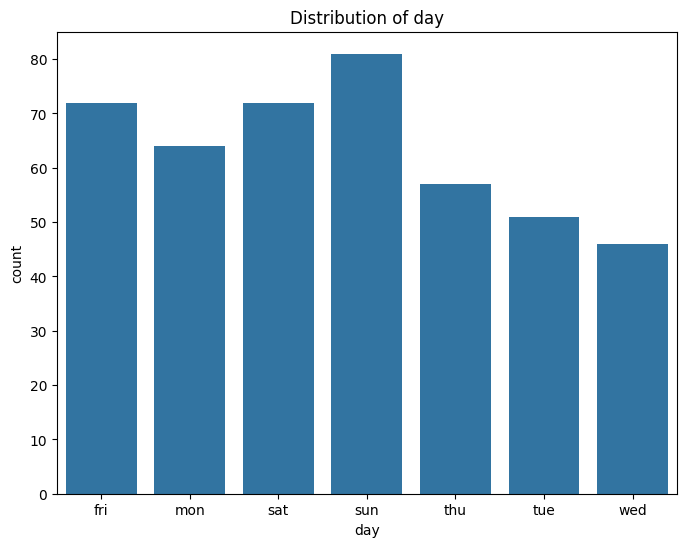


Value Counts for day:
day
sun    81
fri    72
sat    72
mon    64
thu    57
tue    51
wed    46
Name: count, dtype: int64


In [69]:
# 1. Univariate Analysis
print("\n--- Univariate Analysis ---")

# Numerical Variables
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(forest_fire[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.show()

    print(f"\nDescriptive Statistics for {col}:")
    print(forest_fire[col].describe())

# Categorical Variables
categorical_cols=['month', 'day']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=forest_fire[col])  # Countplot for categorical variables
    plt.title(f'Distribution of {col}')
    plt.show()

    print(f"\nValue Counts for {col}:")
    print(forest_fire[col].value_counts())

In [70]:
#Removing the column 'rain' as it does not have any significant impact on the target (Area Burnt)
forest_fire.drop('rain', axis=1, inplace=True)

Bivariate Analysis


--- Bivariate Analysis ---


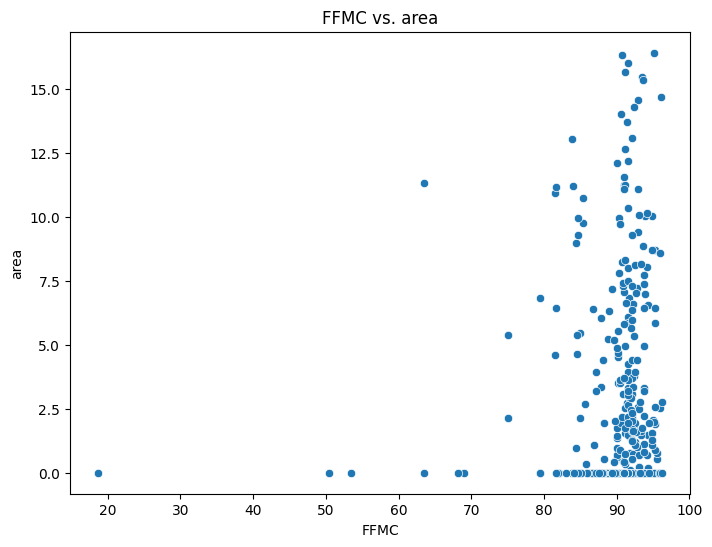

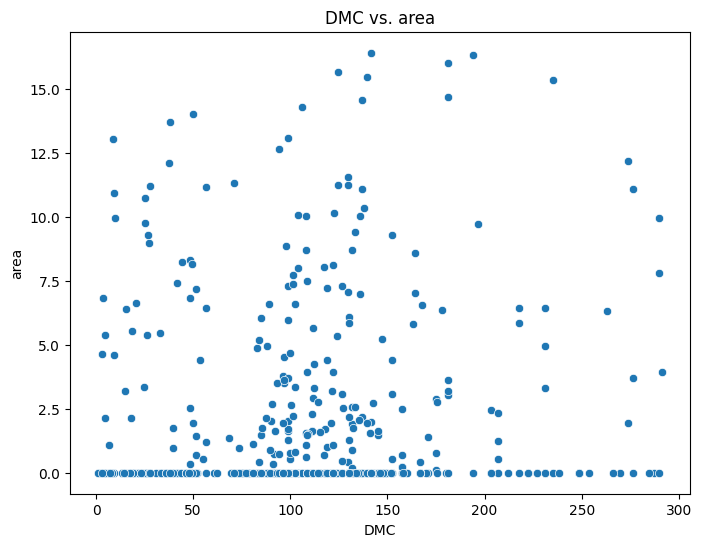

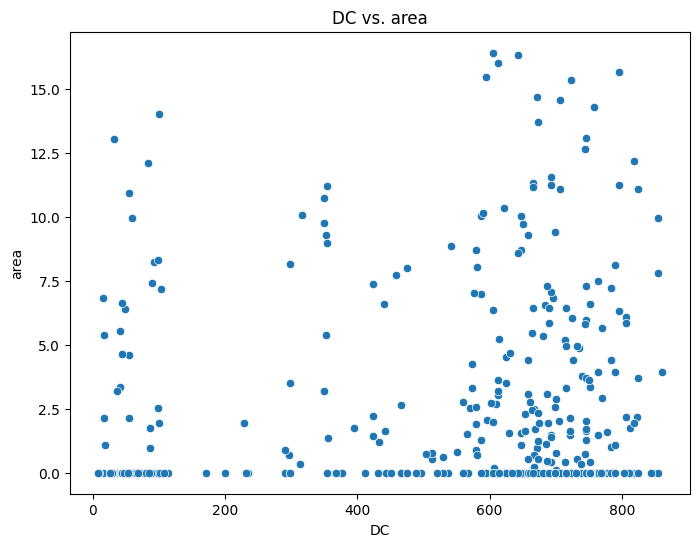

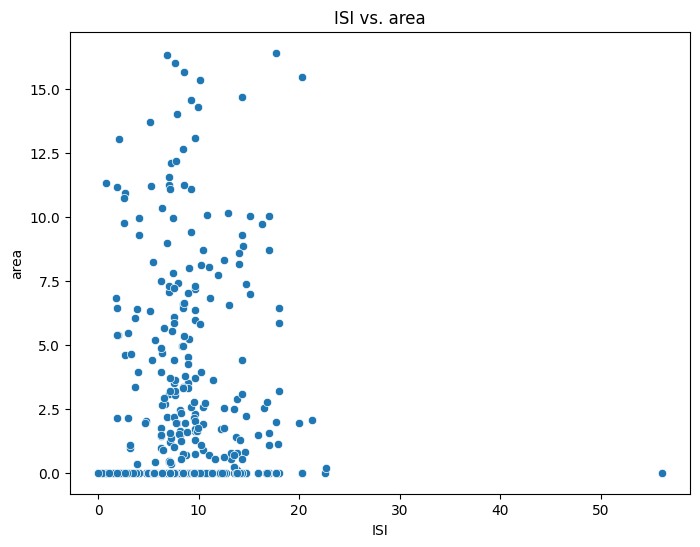

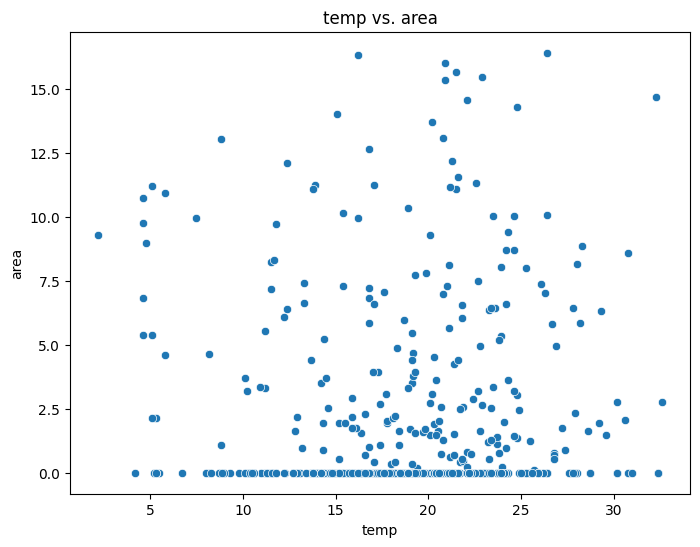

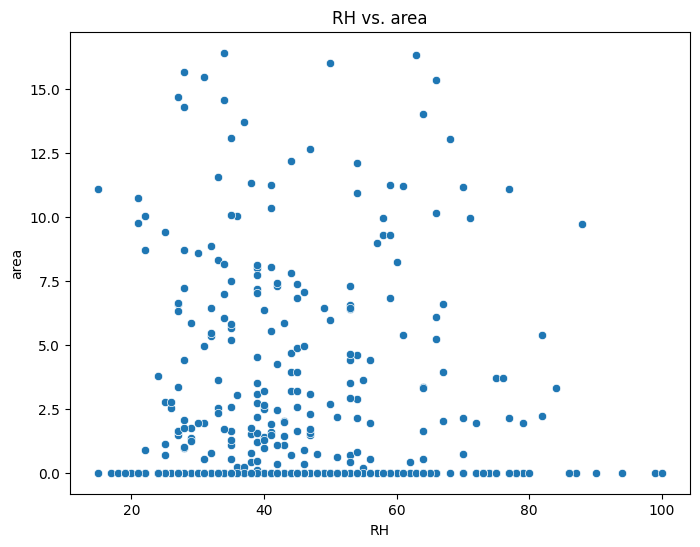

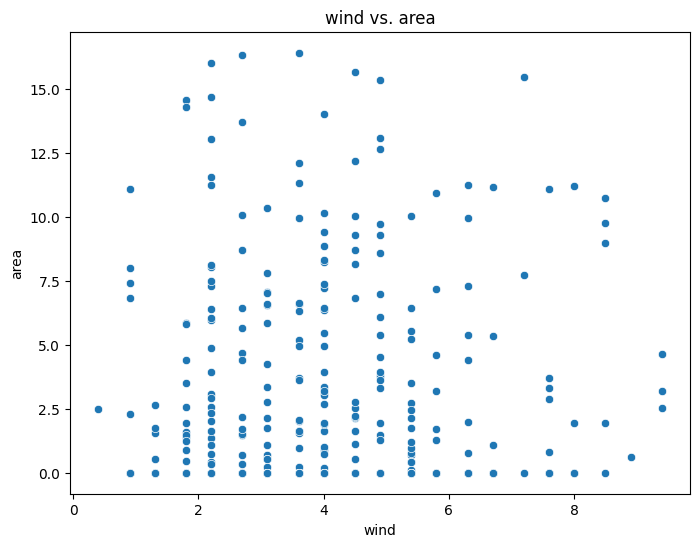

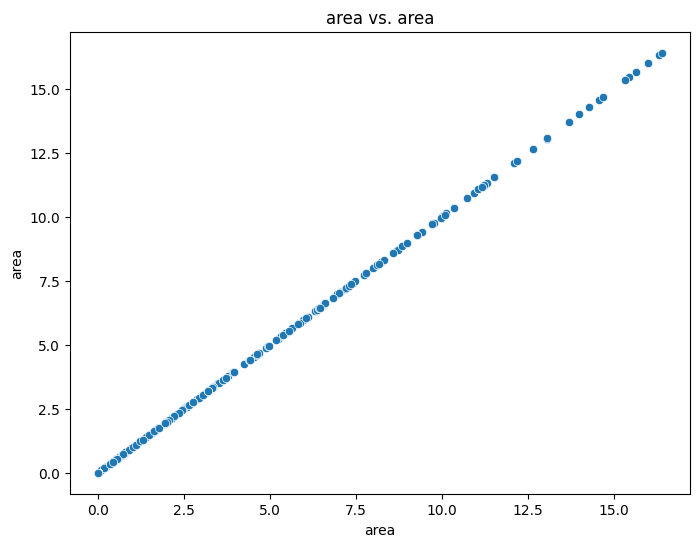

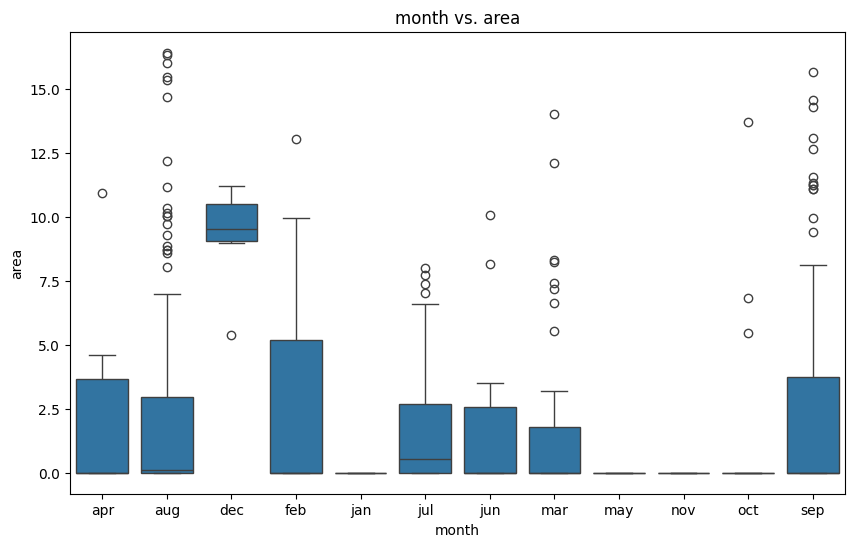

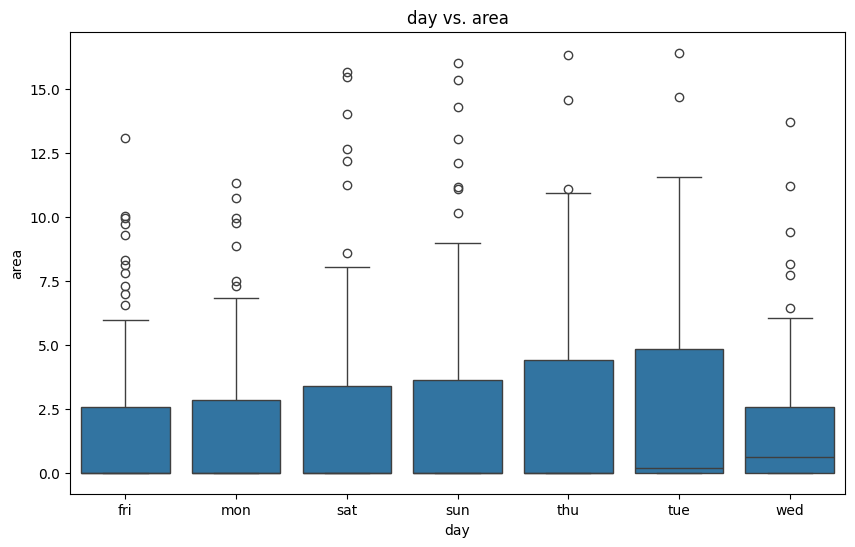

In [71]:
# 2. Bivariate Analysis
print("\n--- Bivariate Analysis ---")

# Numerical vs. Numerical
numeric_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'area']
for col in numeric_cols:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=col, y='area', data=forest_fire)
  plt.title(f'{col} vs. area')
  plt.show()

# Categorical vs. Numerical
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='area', data=forest_fire)
    plt.title(f'{col} vs. area')
    plt.show()

Multivariate Analysis:-
Performing Multivariate analysis using pearson coefficient for columns with numerical values.


--- Multivariate Analysis ---

Correlation Matrix:


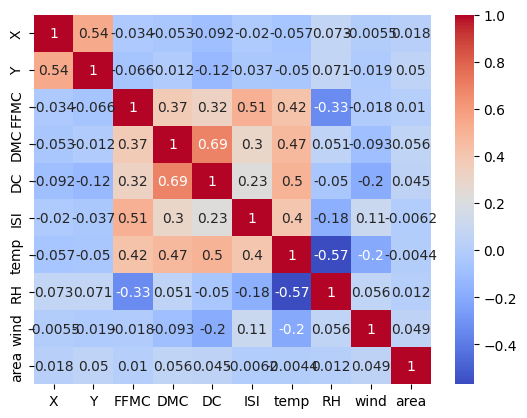

In [72]:
# 3. Multivariate Analysis
print("\n--- Multivariate Analysis ---")

print("\nCorrelation Matrix:")
correlation_matrix = forest_fire.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

